# AutoGen Framework Concept

## What is AutoGen?
AutoGen is an open-source framework developed by Microsoft for creating and orchestrating multi-agent AI systems. Unlike LangChain, which focuses on chaining language model calls with tools and memory for single-agent workflows, AutoGen emphasizes collaboration among multiple AI agents that can converse, share tasks, and integrate with humans and tools to solve complex problems. Each agent in AutoGen can be customized with specific roles, capabilities, and behaviors, making it ideal for tasks requiring dynamic interaction.

## Key Features of AutoGen
- Multi-Agent Collaboration: Agents communicate via natural language or code to solve tasks collaboratively.
- Customizable Agents: Define agents with specific roles, LLMs, tools, or human input modes.
- Code Execution: Supports secure code generation and execution, often in Docker environments.
- Human-in-the-Loop: Allows human intervention at configurable points.
- Extensibility: Integrates with external tools, APIs, and memory systems like Zep or Mem0.
- AutoGen Studio: A low-code interface for prototyping workflows.

## When to Use AutoGen?
- Complex Task Decomposition: When tasks require multiple specialized agents (e.g., a coder and a tester).
- Conversational Workflows: For scenarios needing dynamic agent interactions, like planning or brainstorming.
- Automation with Tools: When integrating LLMs with external APIs, databases, or code execution.
- Human-AI Collaboration: For workflows where humans need to guide or validate AI outputs.
- Prototyping and Scaling: AutoGen is great for rapid prototyping and scaling to production systems.

AutoGen is best for scenarios where LangChain's single-agent approach is limiting, and you need agents to collaborate or specialize.

# 

## Example Working

# 

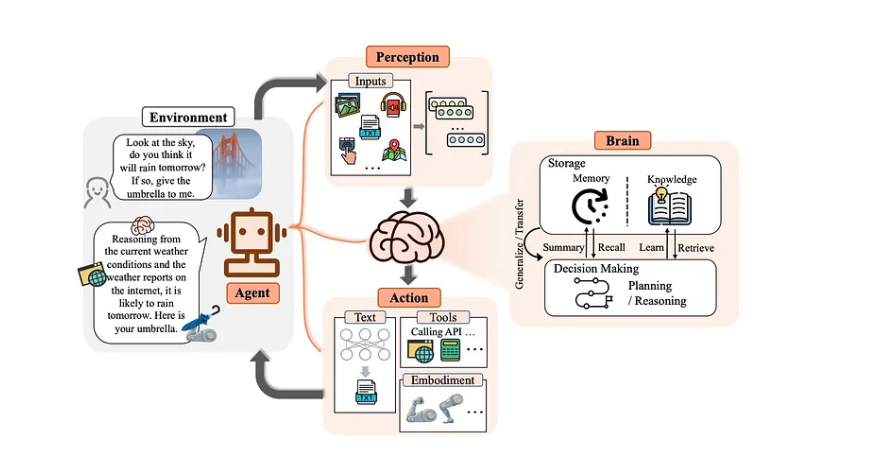

# 

## Example 1: Simple Chatbot with Two Agents
### Objective
Create a basic AutoGen system with two agents: a customer service agent and a user proxy agent. The user asks a question, and the customer service agent responds. This introduces AutoGen's syntax and agent setup.

### Explanation
- UserProxyAgent: Acts as the user or human, initiating the conversation.
- AssistantAgent: Responds to the user's queries using an LLM.
- We'll use a simple setup with OpenAI's GPT model (you can replace it with Grok or another model).
- No code execution or external tools are needed, keeping it beginner-friendly.

In [1]:
import os
from autogen import AssistantAgent, UserProxyAgent

In [ ]:
# Configure the LLM for OpenAI LLMs
config_list = [
    {
        "model": "gpt-4o",
        "api_key": os.getenv("OPENAI_API_KEY")
    }
]

In [3]:
# Configure the LLM from JSON or env
#import autogen
#config_list = autogen.config_list_from_json(env_or_file=".env")

In [ ]:
# Configure the LLM for Azure OpenAI LLMs
config_list = [
    {
        "model": "gpt-4o", # deployment name
        "api_type":"azure",
        "base_url": os.getenv('AZURE_OPENAI_ENDPOINT'),
        "api_key": os.getenv("AZURE_OPENAI_API_KEY"),
        "api_version":os.getenv("OPENAI_API_VERSION")

    }
]

In [9]:
# Create the Assistant Agent (Customer Service)
assistant = AssistantAgent(
    name="CustomerService",
    system_message="You are a helpful customer service agent. Answer questions politely and concisely.",
    llm_config={"config_list": config_list}
)

In [10]:
# Create the User Proxy Agent
user_proxy = UserProxyAgent(
    name="User",
    human_input_mode="NEVER",  # Fully automated for this example
    max_consecutive_auto_reply=1,  # Limit to one reply
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config=False
)

In [11]:
# Initiate the conversation
user_proxy.initiate_chat(
    assistant,
    message="What is the refund policy for your online store?"
)

User (to CustomerService):

What is the refund policy for your online store?

--------------------------------------------------------------------------------
CustomerService (to User):

Our refund policy allows customers to request a refund within 30 days of purchase, provided the item is unused, in its original packaging, and accompanied by proof of purchase. Certain items, such as clearance items or personalized products, may not be eligible for refunds. 

Please refer to the detailed refund policy on our website or contact our customer service team directly for assistance with your specific situation. Let us know if you need any additional help!

--------------------------------------------------------------------------------
User (to CustomerService):



--------------------------------------------------------------------------------
CustomerService (to User):

It seems you may have missed typing your message. Could you clarify your question or let me know how I can assist you? I'

ChatResult(chat_id=None, chat_history=[{'content': 'What is the refund policy for your online store?', 'role': 'assistant', 'name': 'User'}, {'content': 'Our refund policy allows customers to request a refund within 30 days of purchase, provided the item is unused, in its original packaging, and accompanied by proof of purchase. Certain items, such as clearance items or personalized products, may not be eligible for refunds. \n\nPlease refer to the detailed refund policy on our website or contact our customer service team directly for assistance with your specific situation. Let us know if you need any additional help!', 'role': 'user', 'name': 'CustomerService'}, {'content': '', 'role': 'assistant', 'name': 'User'}, {'content': "It seems you may have missed typing your message. Could you clarify your question or let me know how I can assist you? I'm here to help! 😊", 'role': 'user', 'name': 'CustomerService'}], summary="It seems you may have missed typing your message. Could you clari

In [32]:
def dayFinder():
    return {"content":"today is Monday"}


# register a tool with assistant
assistant.register_for_llm(name='dayFinder',description='this can be used to fetch the day today.')(dayFinder)
# Create the User Proxy Agent
user_proxy = UserProxyAgent(
    name="User",
    human_input_mode="NEVER",  # Fully automated for this example
    max_consecutive_auto_reply=1,  # Limit to one reply
    is_termination_msg=lambda x: x.get("content", ""),
    code_execution_config=False
)

# Initiate the conversation
user_proxy.initiate_chat(
    assistant,
    message="What is the day today?"
)

User (to CustomerService):

What is the day today?

--------------------------------------------------------------------------------
CustomerService (to User):

***** Suggested tool call (call_NuWvzCdyBq3Tx5tMn75LmY5S): dayFinder *****
Arguments: 
{}
**************************************************************************

--------------------------------------------------------------------------------
User (to CustomerService):

***** Response from calling tool (call_NuWvzCdyBq3Tx5tMn75LmY5S) *****
Error: Function dayFinder not found.
**********************************************************************

--------------------------------------------------------------------------------
CustomerService (to User):

I couldn't retrieve the day for you at the moment. Would you like to check your device's calendar instead?

--------------------------------------------------------------------------------

>>>>>>>> TERMINATING RUN (71b72a99-edc7-4412-a008-4e2f55f284d4): Maximum number of co

ChatResult(chat_id=None, chat_history=[{'content': 'What is the day today?', 'role': 'assistant', 'name': 'User'}, {'tool_calls': [{'id': 'call_NuWvzCdyBq3Tx5tMn75LmY5S', 'function': {'arguments': '{}', 'name': 'dayFinder'}, 'type': 'function'}], 'content': None, 'role': 'assistant'}, {'content': 'Error: Function dayFinder not found.', 'tool_responses': [{'tool_call_id': 'call_NuWvzCdyBq3Tx5tMn75LmY5S', 'role': 'tool', 'content': 'Error: Function dayFinder not found.'}], 'role': 'tool', 'name': 'User'}, {'content': "I couldn't retrieve the day for you at the moment. Would you like to check your device's calendar instead?", 'role': 'user', 'name': 'CustomerService'}], summary="I couldn't retrieve the day for you at the moment. Would you like to check your device's calendar instead?", cost={'usage_including_cached_inference': {'total_cost': 0.00074, 'gpt-4o-2024-11-20': {'cost': 0.00074, 'prompt_tokens': 156, 'completion_tokens': 35, 'total_tokens': 191}}, 'usage_excluding_cached_inferen

## Explanation of Code
- Import Libraries: We import AutoGen and the necessary agent classes.
- LLM Configuration: Define the model and API key. Replace "gpt-4o" with your preferred model.
- AssistantAgent: Configured with a system message defining its role as a customer service agent.
- UserProxyAgent: Simulates a user, set to auto-reply without human input (human_input_mode="NEVER").
- Initiate Chat: The user proxy starts the conversation with a question, and the assistant responds.

## Example 2: Multi-Agent Blog Post Creation System
### Objective
Build a system with three agents: a planner, a writer, and an editor. The user requests a blog post topic, the planner creates an outline, the writer drafts the content, and the editor refines it. This Example introduces multi-agent collaboration for text generation.

### Explanation
- UserProxyAgent: Requests a blog post topic.
- PlannerAgent: Creates a structured outline for the blog post.
- WriterAgent: Drafts the blog post based on the outline.
- EditorAgent: Polishes the draft for clarity and style.
- This example focuses on text-based collaboration, avoiding code execution for simplicity in a Jupyter Notebook.

In [13]:
import autogen
import os

In [14]:
# Configure the LLM for Azure OpenAI LLMs
config_list = [
    {
        "model": "gpt-4o", # deployment name
        "api_type":"azure",
        "base_url": os.getenv('AZURE_OPENAI_ENDPOINT'),
        "api_key": os.getenv("AZURE_OPENAI_API_KEY"),
        "api_version":os.getenv("OPENAI_API_VERSION")

    }
]

In [15]:
# User Proxy Agent
user_proxy = autogen.UserProxyAgent(
    name="User",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=5,  # Allow multiple agent interactions
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config=False
)

In [20]:
# Planner Agent
planner = autogen.AssistantAgent(
    name="Planner",
    system_message="You are a content planner. Create a detailed outline for a blog post based on the user's topic. Include sections like Introduction, Main Points, and Conclusion.",
    llm_config={"config_list": config_list}
)

In [21]:
# Writer Agent
writer = autogen.AssistantAgent(
    name="Writer",
    system_message="You are a content writer. Write a blog post based on the provided outline. Keep it engaging and informative, around 300 words.",
    llm_config={"config_list": config_list}
)

In [22]:
# Editor Agent
editor = autogen.AssistantAgent(
    name="Editor",
    system_message="You are an editor. Refine the blog post draft for clarity, grammar, and style. Ensure it is concise and professional.",
    llm_config={"config_list": config_list}
)

In [23]:
# Define the task
task = "Create a blog post about the benefits of learning Python for beginners."

In [24]:
# Create a GroupChat
group_chat = autogen.GroupChat(
    agents=[user_proxy, planner, writer, editor],
    messages=[],
    max_round=10  # Limit the number of rounds to avoid infinite loops
)

In [25]:
# Create a GroupChatManager to manage the conversation
group_chat_manager = autogen.GroupChatManager(
    groupchat=group_chat,  # Changed from group_chat to groupchat
    llm_config={"config_list": config_list}
)

In [26]:
# Start the workflow
user_proxy.initiate_chat(
    group_chat_manager,
    message=f"{task}\nPlanner, please create a detailed outline for the blog post. Writer, use the outline to write the blog post. Editor, refine the draft for clarity and professionalism. Terminate when done."
)

User (to chat_manager):

Create a blog post about the benefits of learning Python for beginners.
Planner, please create a detailed outline for the blog post. Writer, use the outline to write the blog post. Editor, refine the draft for clarity and professionalism. Terminate when done.

--------------------------------------------------------------------------------

Next speaker: Planner

Planner (to chat_manager):

### Content Planner: Blog Post Outline

**Topic**: The Benefits of Learning Python for Beginners

---

#### **1. Introduction**
- Brief introduction to programming and the importance of choosing the right programming language.
- Why Python stands out as a great choice for beginners.
- Overview of what the blog post will cover.

---

#### **2. What Is Python?**
- Short explanation of Python as a programming language.
- Emphasis on its simplicity, readability, and wide use.

---

#### **3. Key Benefits of Learning Python**
- **a. Easy to Learn and Use**  
  - Python's simple a

ChatResult(chat_id=None, chat_history=[{'content': 'Create a blog post about the benefits of learning Python for beginners.\nPlanner, please create a detailed outline for the blog post. Writer, use the outline to write the blog post. Editor, refine the draft for clarity and professionalism. Terminate when done.', 'role': 'assistant', 'name': 'User'}, {'content': "### Content Planner: Blog Post Outline\n\n**Topic**: The Benefits of Learning Python for Beginners\n\n---\n\n#### **1. Introduction**\n- Brief introduction to programming and the importance of choosing the right programming language.\n- Why Python stands out as a great choice for beginners.\n- Overview of what the blog post will cover.\n\n---\n\n#### **2. What Is Python?**\n- Short explanation of Python as a programming language.\n- Emphasis on its simplicity, readability, and wide use.\n\n---\n\n#### **3. Key Benefits of Learning Python**\n- **a. Easy to Learn and Use**  \n  - Python's simple and intuitive syntax.\n  - How it

In [27]:
# Terminate the workflow explicitly
user_proxy.initiate_chat(
    group_chat_manager,
    message="TERMINATE"
)

User (to chat_manager):

TERMINATE

--------------------------------------------------------------------------------

>>>>>>>> TERMINATING RUN (97ef57b7-1c76-47ce-b9a4-aa063efdb33e): Termination message condition on the GroupChatManager 'chat_manager' met


ChatResult(chat_id=None, chat_history=[{'content': 'TERMINATE', 'role': 'assistant', 'name': 'User'}], summary='', cost={'usage_including_cached_inference': {'total_cost': 0}, 'usage_excluding_cached_inference': {'total_cost': 0}}, human_input=[])

## Explanation of Code
### Agent Setup:
- Agent Setup:
    - Planner: Generates a structured outline (e.g., Introduction, Why Learn Python, Key Benefits, Conclusion).
    - Writer: Drafts a blog post based on the outline.
    - Editor: Polishes the draft for readability and style.
    - UserProxy: Coordinates the workflow using a group chat.
- GroupChat: Includes all agents and limits interactions to 10 rounds.
- GroupChatManager: Manages the conversation flow, ensuring agents pass outputs (outline, draft, final post).
- Task Flow: The user proxy initiates the task, the planner creates the outline, the writer drafts the post, and the editor refines it.
- Termination: The workflow ends with a "TERMINATE" message.

## Example 3: Multi-Agent Financial Analysis System

### Objective
Build a sophisticated multi-agent system for financial analysis without code execution, using a group chat for coordination. The system includes a data fetcher, an analyst, a summarizer, and a user proxy to simulate stock data analysis, generate insights, and produce a concise report. This Example is documented like a production system.

### Example Overview
This system automates stock analysis by:

- Simulating stock data descriptions for a given ticker.
- Analyzing the data to provide insights (e.g., trends, volatility).
- Summarizing insights into a concise report.
- Coordinating agents via a group chat for seamless collaboration.

### System Architecture
- UserProxyAgent: Initiates the task and coordinates agents.
- DataFetcherAgent: Simulates fetching stock data (e.g., describes AAPL data for 6 months).
- AnalystAgent: Analyzes the simulated data and generates insights.
- SummarizerAgent: Creates a concise report from the analysis.
- GroupChatManager: Manages the conversation flow among agents.


### Agent Configurations
- UserProxyAgent:
    - Role: Task initiator and coordinator.
    - Config: Automated replies, no code execution, termination on "TERMINATE".
- DataFetcherAgent:
    - Role: Simulates fetching stock data for a given ticker (e.g., AAPL).
    - System Message: Describes 6 months of stock data (e.g., closing prices, volume).
- AnalystAgent:
    - Role: Analyzes the simulated data (e.g., trends, volatility).
    - System Message: Focuses on generating actionable insights.
- SummarizerAgent:
    - Role: Creates a concise report from the analysis.
    - System Message: Summarizes insights into a professional format.

### Workflow
- User proxy initiates the task in the group chat, instructing the DataFetcherAgent to provide simulated stock data.
- DataFetcherAgent generates a data description and shares it.
- AnalystAgent processes the data and provides insights.
- SummarizerAgent creates a concise report.
- Workflow terminates with a "TERMINATE" message.

In [65]:
import autogen
import os

In [66]:
# LLM Configuration
config_list = [
    {
        "model": "gpt-4o",
        "api_key": os.getenv("OPENAI_API_KEY")
    }
]

In [67]:
# User Proxy Agent
user_proxy = autogen.UserProxyAgent(
    name="User",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,  # Increased to allow more interactions
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config=False
)

In [68]:
# Data Fetcher Agent
data_fetcher = autogen.AssistantAgent(
    name="DataFetcher",
    system_message="""
You are a data retrieval agent. Simulate fetching historical stock data for a given ticker (e.g., AAPL) for the past 6 months. Provide a detailed description of the data, including:
- Date range: Last 6 months
- Closing prices: Approximate range (e.g., $150–$200)
- Volume: Approximate average daily volume
- Trend: General direction (upward/downward)
Return the description as a text summary and pass it to the Analyst.
""",
    llm_config={"config_list": config_list}
)

In [69]:
# Analyst Agent
analyst = autogen.AssistantAgent(
    name="Analyst",
    system_message="""
You are a financial analyst. Analyze the stock data description provided by the DataFetcher. Provide insights on:
1. Trend analysis (upward/downward).
2. Volatility (based on price range).
3. Recommendations (buy, hold, sell).
Return a detailed report and pass it to the Summarizer.
""",
    llm_config={"config_list": config_list}
)

In [70]:
# Summarizer Agent
summarizer = autogen.AssistantAgent(
    name="Summarizer",
    system_message="""
You are a report summarizer. Take the analysis from the Analyst and create a concise report (100–150 words) summarizing the key insights and recommendations in a professional format. Output the final report.
""",
    llm_config={"config_list": config_list}
)

In [71]:
# Define the task
task = """
Analyze the stock performance of AAPL for the past 6 months. Provide a detailed analysis and a concise report summarizing the findings.
"""

In [72]:
# Create a GroupChat
group_chat = autogen.GroupChat(
    agents=[user_proxy, data_fetcher, analyst, summarizer],
    messages=[],
    max_round=10  # Limit the number of rounds to avoid infinite loops
)

In [73]:
# Create a GroupChatManager to manage the conversation
group_chat_manager = autogen.GroupChatManager(
    groupchat=group_chat,
    llm_config={"config_list": config_list}
)

In [74]:
# Start the workflow
user_proxy.initiate_chat(
    group_chat_manager,
    message=f"{task}\nDataFetcher, please provide a simulated description of AAPL stock data for the past 6 months. Analyst, analyze the data. Summarizer, create a concise report. Terminate when done."
)

User (to chat_manager):


Analyze the stock performance of AAPL for the past 6 months. Provide a detailed analysis and a concise report summarizing the findings.

DataFetcher, please provide a simulated description of AAPL stock data for the past 6 months. Analyst, analyze the data. Summarizer, create a concise report. Terminate when done.

--------------------------------------------------------------------------------

Next speaker: DataFetcher

DataFetcher (to chat_manager):

DataFetcher: 

For the AAPL stock over the past 6 months, here is a simulated description of the historical data:

- **Date Range**: April 2023 to October 2023.
- **Closing Prices**: The closing prices fluctuated between approximately $165 and $190, with some volatility throughout the period.
- **Volume**: The average daily trading volume for AAPL was around 90 million shares, although there were days with significantly higher or lower volumes based on key announcements or market events.
- **Trend**: The genera

ChatResult(chat_id=None, chat_history=[{'content': '\nAnalyze the stock performance of AAPL for the past 6 months. Provide a detailed analysis and a concise report summarizing the findings.\n\nDataFetcher, please provide a simulated description of AAPL stock data for the past 6 months. Analyst, analyze the data. Summarizer, create a concise report. Terminate when done.', 'role': 'assistant', 'name': 'User'}, {'content': "DataFetcher: \n\nFor the AAPL stock over the past 6 months, here is a simulated description of the historical data:\n\n- **Date Range**: April 2023 to October 2023.\n- **Closing Prices**: The closing prices fluctuated between approximately $165 and $190, with some volatility throughout the period.\n- **Volume**: The average daily trading volume for AAPL was around 90 million shares, although there were days with significantly higher or lower volumes based on key announcements or market events.\n- **Trend**: The general trend of AAPL's stock over this period has been up

In [75]:
# Terminate the workflow explicitly
user_proxy.initiate_chat(
    group_chat_manager,
    message="TERMINATE"
)

User (to chat_manager):

TERMINATE

--------------------------------------------------------------------------------

>>>>>>>> TERMINATING RUN (97e65bef-81a7-45c1-81fb-46fe452c8c4a): Termination message condition on the GroupChatManager 'chat_manager' met


ChatResult(chat_id=None, chat_history=[{'content': 'TERMINATE', 'role': 'assistant', 'name': 'User'}], summary='', cost={'usage_including_cached_inference': {'total_cost': 0}, 'usage_excluding_cached_inference': {'total_cost': 0}}, human_input=[])

In [90]:
group_chat_manager.chat_messages

defaultdict(list,
            {<autogen.agentchat.user_proxy_agent.UserProxyAgent at 0x1d42631bf40>: [{'content': 'TERMINATE',
               'role': 'user',
               'name': 'User'}],
             <autogen.agentchat.assistant_agent.AssistantAgent at 0x1d42631a2c0>: [{'content': '\nAnalyze the stock performance of AAPL for the past 6 months. Provide a detailed analysis and a concise report summarizing the findings.\n\nDataFetcher, please provide a simulated description of AAPL stock data for the past 6 months. Analyst, analyze the data. Summarizer, create a concise report. Terminate when done.',
               'name': 'User',
               'role': 'assistant'},
              {'content': "DataFetcher: \n\nFor the AAPL stock over the past 6 months, here is a simulated description of the historical data:\n\n- **Date Range**: April 2023 to October 2023.\n- **Closing Prices**: The closing prices fluctuated between approximately $165 and $190, with some volatility throughout the perio

## Explanation of Code
- Agent Setup:
    - UserProxy: Coordinates the workflow, fully automated (human_input_mode="NEVER", max_consecutive_auto_reply=10), no code execution (code_execution_config=False), terminates on "TERMINATE".
    - DataFetcher: Simulates AAPL stock data (price range, volume, trend) and passes it to the Analyst.
    - Analyst: Analyzes data for trends, volatility, and recommendations, sending a report to the Summarizer.
    - Summarizer: Condenses the Analyst’s report into a concise 100–150-word summary.
- GroupChat: Includes all agents, limits to 10 rounds to avoid infinite loops.
- GroupChatManager: Manages dynamic agent interactions, ensuring smooth data handoff.
- Task Flow: UserProxy starts the task, DataFetcher provides data, Analyst generates insights, Summarizer creates the final report.
-   Termination: Ends with a "TERMINATE" message from UserProxy.